## Introduction

This notebook goes throug the example [^ibm-textbook-grover] : https://community.qiskit.org/textbook/ch-algorithms/grover.html explaining it in more details, showing also the matrix calculus for the quantum gates.


## Grover's algorithm

Groover algoriths is for searching the unstructded database. In this example is shown, how to perform a groover algorithm on a system to get te probabilites only for marked states.

Description + info when it is usable

http://research.ibm.com/ibm-q/quantum-card-test/

## Example

According to the: https://community.qiskit.org/textbook/ch-algorithms/grover.html.
We have got three qubits and two marked states: |101> and |110>.





Explain how to construct multiqubit quantum gates as matrices: https://quantumcomputing.stackexchange.com/questions/4252/how-to-derive-the-cnot-matrix-for-a-3-qbit-system-where-the-control-target-qbi/4255#4255

Do the calculations.
Show the quantum program.


Prepare quantum gates in matrix representation:

In [1]:
import numpy as np
from qiskit.extensions import HGate, CnotGate, IdGate, XGate, CzGate, ZGate

# |0>, |1>
zero = np.array([[1.],
                 [0.]]) 

one = np.array([[0.],
                [1.]]) 

# Gates: I, Z, H, X
I = IdGate().to_matrix()
Z = ZGate().to_matrix()
H = 1./np.sqrt(2) * np.array([[1, 1],
                              [1, -1]])
X = XGate().to_matrix()

# 3-qubit Hadamard gate
Hq012 = np.kron(np.kron(H,H),H)

# 3-qubit cZ gates

# |0><0|
p00 = zero * np.array([1, 0])
print(p00)
# |1><1|
p11 = one * np.array([0, 1])
# 
# control = 1 (|0><0| + |1><1|), target = 0 (Z), uninvoled =2 (I)
# 012 + 012 - qubit indexint
# 
cz10 = np.kron(np.kron(I, p00), I) + np.kron(np.kron(Z, p11), I)

cz20 = np.kron(np.kron(I, I), p00) + np.kron(np.kron(Z, I), p11)

# 
# control = (|0><0| + |1><1|), 
# target = (Z)
# control = 21
# target  = 0 
#ccz210 = np.kron(np.kron(p00, p00), I) + np.kron(np.kron(p11, p11), Z) #wg mnie powinno być tak zaindesowane
ccz210 = np.kron(np.kron(I, p00), p00) + np.kron(np.kron(Z, p11), p11) #na opak działa?


[[1. 0.]
 [0. 0.]]


Prepare qiskit:

In [2]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

**1. Build 3 qubit register**

Combine 3 qubits in state |0> to make one three qubit register: |000> [^lh-tut-qubytes]
$$ \ket{\psi} = \ket{000} $$

**matrix:**

In [3]:
state = np.kron(np.kron(zero, zero), zero)
state

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Note, you can treat is as bit string, calucluateing the value of the state form binnary to decemial (eg. |000> = 0, |101> = 5) tells you when the `1` is int the vector (on the 0th or 5th postion accordinglgy)

**qiskit:**

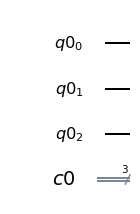

In [4]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
circ = QuantumCircuit(q, c)

circ.draw(output='mpl')


**2. Superposiotion**

Apply Hadamard gates to $3$ qubits initialised to $\ket{000}$ to create a uniform superposition:

$$ \ket{\psi_1} = H\ket{\psi}$$ 

  $$\lvert \psi_1 \rangle = \frac{1}{\sqrt{8}} \left( 
    \lvert000\rangle + \lvert001\rangle + \lvert010\rangle + \lvert011\rangle + 
    \lvert100\rangle + \lvert101\rangle + \lvert110\rangle + \lvert111\rangle \right) $$

**matrix:**

In [5]:

state = np.dot(Hq012, state)
state

array([[0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339],
       [0.35355339]])

**qiskit:**

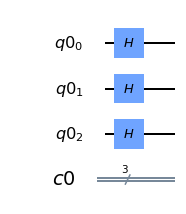

In [6]:
circ.h(q)
circ.draw(output='mpl')

**3. Oracle**

(put the circuit graph here, with highlighted the oracle)


Mark states $\lvert101\rangle$ and $\lvert110\rangle$ using a phase oracle:

$$\ket{\psi_2} = CZ_{10}\ket{CZ_{20}\ket{\psi_1}} $$


  $$\lvert \psi_2 \rangle = \frac{1}{\sqrt{8}} \left( 
    \lvert000\rangle + \lvert001\rangle + \lvert010\rangle + \lvert011\rangle + 
    \lvert100\rangle - \lvert101\rangle - \lvert110\rangle + \lvert111\rangle \right) $$


**math:**

In [7]:
oracle =cz20*cz10
state = np.dot(oracle, state)
state

array([[ 0.35355339+0.j],
       [ 0.35355339+0.j],
       [ 0.35355339+0.j],
       [ 0.35355339+0.j],
       [ 0.35355339+0.j],
       [-0.35355339+0.j],
       [-0.35355339+0.j],
       [ 0.35355339+0.j]])

**qiskit:**

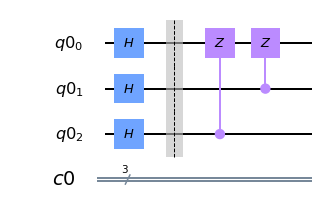

In [8]:
circ.barrier() # for readabilty
circ.cz(q[2], q[0])
circ.cz(q[1], q[0])
circ.draw(output='mpl')

**4. Amplify probability**

a). Apply Hadamard gates to the qubits:
$$ \ket{\psi_{3a}} = H\ket{\psi_2} $$ 

$$\lvert \psi_{3a} \rangle = \frac{1}{2} \left( 
        \lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right) $$

**matrix:**

In [9]:
state = np.dot(Hq012, state)
state

array([[ 5.00000000e-01+0.j],
       [ 0.00000000e+00+0.j],
       [ 2.77555756e-17+0.j],
       [ 5.00000000e-01+0.j],
       [ 5.00000000e-01+0.j],
       [ 0.00000000e+00+0.j],
       [ 2.77555756e-17+0.j],
       [-5.00000000e-01+0.j]])

**qiskit:**

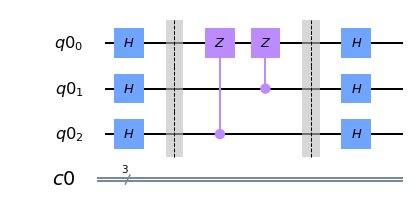

In [10]:
circ.barrier() # for readabilty
circ.h(q)
circ.draw(output='mpl')

b). Apply X gates to the qubits:
$$ \ket{\psi_{3b}} = X\ket{\psi_{3a}} $$ 
$$\lvert \psi_{3b} \rangle = \frac{1}{2} \left( 
        -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle +\lvert111\rangle \right) $$

In [11]:
Xq012 = np.kron(np.kron(X,X), X)
state = np.dot(Xq012, state)
state

array([[-5.00000000e-01+0.j],
       [ 2.77555756e-17+0.j],
       [ 0.00000000e+00+0.j],
       [ 5.00000000e-01+0.j],
       [ 5.00000000e-01+0.j],
       [ 2.77555756e-17+0.j],
       [ 0.00000000e+00+0.j],
       [ 5.00000000e-01+0.j]])

**qiskit:**

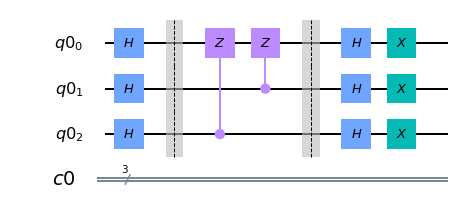

In [12]:
circ.x(q)
circ.draw(output='mpl')

c). Apply a doubly controlled Z gate between the 0, 1 (controls) and 2 (target) qubits

$$ \ket{\psi_{3c}} = CCZ_{012}\ket{\psi_{3b}} $$ 

$$ \lvert \psi_{3c} \rangle = \frac{1}{2} \left(-\lvert000\rangle +\lvert011\rangle  +\lvert100\rangle -\lvert111\rangle \right) $$

**matrix:**

In [13]:
state = np.dot(ccz210, state)
state

array([[-0.5+0.j],
       [ 0. +0.j],
       [ 0. +0.j],
       [ 0.5+0.j],
       [ 0.5+0.j],
       [ 0. +0.j],
       [ 0. +0.j],
       [-0.5+0.j]])

**qiskit:**

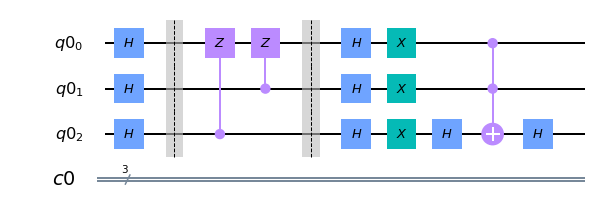

In [14]:
# There is no ccz gate in qiskit so we need to implement it using h-ccx-h
circ.h(q[2])
circ.ccx(q[0], q[1], q[2])
circ.h(q[2])
circ.draw(output='mpl')

d). Apply X gates to the qubits

$$ \ket{\psi_{3d}} = X\ket{\psi_{3c}} $$

 $$\lvert \psi_{3d} \rangle = \frac{1}{2} \left( 
        -\lvert000\rangle +\lvert011\rangle +\lvert100\rangle -\lvert111\rangle \right) $$

**matrix:**

In [15]:
state = np.dot(Xq012, state)
state

array([[-0.5+0.j],
       [ 0. +0.j],
       [ 0. +0.j],
       [ 0.5+0.j],
       [ 0.5+0.j],
       [ 0. +0.j],
       [ 0. +0.j],
       [-0.5+0.j]])

**qiskit:**

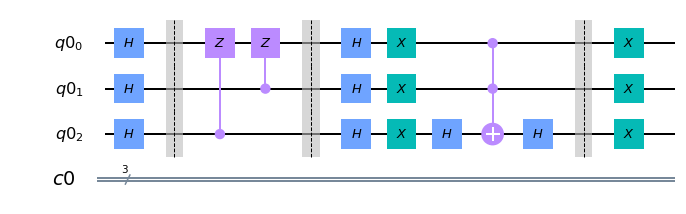

In [16]:
circ.barrier() # for readabilty
circ.x(q)
circ.draw(output='mpl')

e). Apply Hadamard gates to the qubits

$$ \ket{\psi_{3e}} = H\ket{\psi_{3d}} $$
$$\lvert \psi_{3e} \rangle = \frac{1}{\sqrt{2}} \left( 
        -\lvert101\rangle -\lvert110\rangle \right) $$

**matrix:**

In [17]:
state = np.dot(Hq012, state)
state

array([[ 0.00000000e+00+0.j],
       [ 9.52420783e-18+0.j],
       [ 9.52420783e-18+0.j],
       [ 0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j],
       [-7.07106781e-01+0.j],
       [-7.07106781e-01+0.j],
       [ 0.00000000e+00+0.j]])

Results 5: |101>, 6: |110>.

(look carefully that states 1 = |001>, and 2 = |010>, are almost equal to `0`.



**qiskit:**

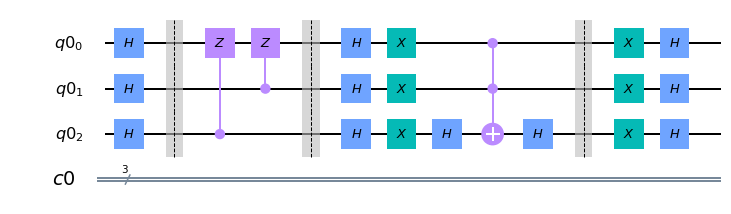

In [18]:
circ.h(q)
circ.draw(output='mpl')

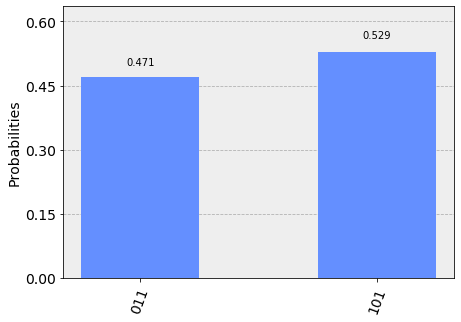

In [20]:
circ.measure(q, c)
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(circ, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

Paste the screenshot of the other oracles from the pub [^3-qubit-search]

## How to do the database search?

## Questions

1. We know the marked state to create the oracle. So the Grover algorithm gives us the same ouptpu. What for use the algo? The real reason for me is use it when I don't know the marked state - only the constraints it has to meet.

## Refferences

- [^ibm-textbook-grover]: https://community.qiskit.org/textbook/ch-algorithms/grover.html
- [^3-qubit-search]: C. Figgatt, D. Maslov, K. A. Landsman, N. M. Linke, S. Debnath & C. Monroe (2017), "Complete 3-Qubit Grover search on a programmable quantum computer", Nature Communications, Vol 8, Art 1918, doi:10.1038/s41467-017-01904-7, arXiv:1703.10535
- [^lh-tut-qubytes]: lukaszherok.com